In [1]:
import sys
import numpy as np
from sklearn.metrics import confusion_matrix

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

import scipy as sp
import scipy.io as spio
import matplotlib.pylab as pl

from tensorflow.python import keras
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Flatten, Conv1D, Dropout, MaxPooling1D, Reshape, GlobalAveragePooling1D
from tensorflow.python.keras.utils import np_utils

import keras.backend as K

config = K.tf.ConfigProto()
config.gpu_options.allow_growth = True
#session = K.tf.Session(config=config)


Using TensorFlow backend.


In [2]:
dataset = np.loadtxt("datalast.csv",delimiter=",")
X = dataset[:,0:177]
y = dataset[:,178]


#print(X[0].shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(y)


print(X_train.shape)
print (y_train.shape)

[4. 1. 5. ... 5. 3. 4.]
(9200, 177)
(9200,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = y_train.reshape(y_train.shape[0],1)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_test = y_test.reshape(y_test.shape[0],1)


print(X_train.shape)
print (y_train.shape)

print(X_test.shape)
print(y_test.shape)

(9200, 177, 1)
(9200, 1)
(2300, 177, 1)
(2300, 1)


In [4]:
y_train_hot = np_utils.to_categorical(y_train-1, 5) # subtracting y_train-1 as keras starts num_Classes index from 0 and we had it from 1 to 5
print('New y_train shape: ', y_train_hot.shape)

y_test_hot = np_utils.to_categorical(y_test-1, 5) # subtracting y_train-1 as keras starts num_Classes index from 0 and we had it from 1 to 5
print('New y_test shape: ', y_test_hot.shape)

New y_train shape:  (9200, 5)
New y_test shape:  (2300, 5)


In [5]:
model_m = Sequential()
model_m.add(Conv1D(60, 10, activation='relu', input_shape=(177,1)))
model_m.add(Conv1D(60, 10, activation='relu'))
model_m.add(MaxPooling1D(2))
model_m.add(Dropout(0.15))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(Conv1D(100, 10, activation='relu'))
model_m.add(MaxPooling1D(2))
model_m.add(Dropout(0.15))
model_m.add(Conv1D(50, 5, activation='relu'))
model_m.add(GlobalAveragePooling1D())
model_m.add(Dropout(0.15))
model_m.add(Dense(5, activation='softmax'))
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 168, 60)           660       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 159, 60)           36060     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 79, 60)            0         
_________________________________________________________________
dropout (Dropout)            (None, 79, 60)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 70, 100)           60100     
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 61, 100)           100100    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 100)           0         
__________

Train on 7360 samples, validate on 1840 samples
Epoch 1/80
7360/7360 [==============================] - 4s 482us/step - loss: 2.1765 - acc: 0.2367 - val_loss: 1.3810 - val_acc: 0.3293
Epoch 2/80
7360/7360 [==============================] - 1s 93us/step - loss: 1.2973 - acc: 0.3576 - val_loss: 1.2103 - val_acc: 0.4951
Epoch 3/80
7360/7360 [==============================] - 1s 94us/step - loss: 1.1762 - acc: 0.4656 - val_loss: 1.0765 - val_acc: 0.5745
Epoch 4/80
7360/7360 [==============================] - 1s 94us/step - loss: 1.0927 - acc: 0.5106 - val_loss: 1.0463 - val_acc: 0.5255
Epoch 5/80
7360/7360 [==============================] - 1s 94us/step - loss: 0.9800 - acc: 0.5765 - val_loss: 0.8853 - val_acc: 0.6386
Epoch 6/80
7360/7360 [==============================] - 1s 94us/step - loss: 0.9050 - acc: 0.6043 - val_loss: 0.8175 - val_acc: 0.6511
Epoch 7/80
7360/7360 [==============================] - 1s 92us/step - loss: 0.8429 - acc: 0.6310 - val_loss: 0.7734 - val_acc: 0.6734
Epoch 

Epoch 61/80
7360/7360 [==============================] - 1s 92us/step - loss: 0.2887 - acc: 0.8683 - val_loss: 0.4417 - val_acc: 0.8060
Epoch 62/80
7360/7360 [==============================] - 1s 93us/step - loss: 0.2848 - acc: 0.8749 - val_loss: 0.4445 - val_acc: 0.8125
Epoch 63/80
7360/7360 [==============================] - 1s 92us/step - loss: 0.2666 - acc: 0.8830 - val_loss: 0.5273 - val_acc: 0.7848
Epoch 64/80
7360/7360 [==============================] - 1s 92us/step - loss: 0.2851 - acc: 0.8730 - val_loss: 0.4387 - val_acc: 0.8076
Epoch 65/80
7360/7360 [==============================] - 1s 93us/step - loss: 0.2521 - acc: 0.8864 - val_loss: 0.4828 - val_acc: 0.7957
Epoch 66/80
7360/7360 [==============================] - 1s 93us/step - loss: 0.2647 - acc: 0.8841 - val_loss: 0.4443 - val_acc: 0.8082
Epoch 67/80
7360/7360 [==============================] - 1s 92us/step - loss: 0.2510 - acc: 0.8904 - val_loss: 0.4696 - val_acc: 0.8060
Epoch 68/80
7360/7360 [=========================

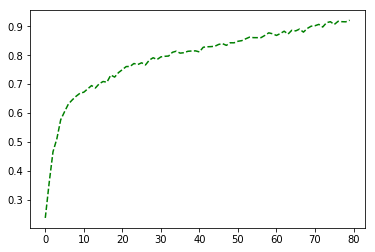

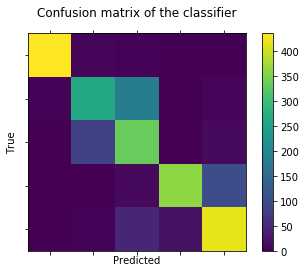


--- Learning curve of model training ---



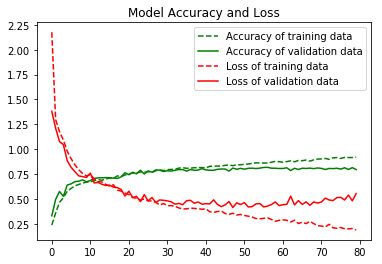

In [6]:
# Compile model
model_m.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
history=model_m.fit(X_train, y_train_hot, batch_size = 400, epochs=80, validation_split=0.2, verbose=1)


pl.plot(history.history['acc'], "g--", label="Accuracy of training data")
#evaluate the model
scores=model_m.evaluate(X_test, y_test_hot, verbose=1)
print("%s: %.2f%%" % (model_m.metrics_names[1], scores[1]*100))

predictions = model_m.predict(X_test)
y_test_hot = np.argmax(y_test_hot, axis=-1)
predictions = np.argmax(predictions, axis=-1)
c = confusion_matrix(y_test_hot, predictions)
print('Confusion matrix:\n', c)
fig = pl.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(c)
pl.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] )
ax.set_yticklabels([''])
pl.xlabel('Predicted')
pl.ylabel('True')
pl.show()
print("\n--- Learning curve of model training ---\n")
pl.figure()
pl.plot(history.history['acc'], "g--", label="Accuracy of training data")
pl.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
pl.plot(history.history['loss'], "r--", label="Loss of training data")
pl.plot(history.history['val_loss'], "r", label="Loss of validation data")
pl.title('Model Accuracy and Loss')
pl.legend()
pl.show()